# PlotResults.ipynb
### example notebook demonstrating how to plot and inspect simulation outputs

In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

In [2]:
from MADLens.util import *

### list all possible run files

In [3]:
run_dir   = '../runs'

githashes = os.listdir(run_dir)
for githash in githashes:
    print(githash)
    path = os.path.join(run_dir,githash)
    print(os.listdir(path))

2120673
['small_run.json', 'test_run_20.json', 'small_run_0.json', 'test_run_40.json', 'test_run_00.json', 'small_run_10.json', 'small_run_00.json', 'test_run_30.json', 'test_run_10.json']
c0f314b
['deriv_run0.json']
b2f7b0b
['test_run_20.json', 'test_run_40.json', 'test_run_00.json', 'test_run_30.json', 'test_run_10.json']
cd8f0a9
['med_res0.json', 'small_res0.json']
eba3a69
['test_run_20.json', 'test_run_40.json', 'test_run_00.json', 'test_run_30.json', 'test_run_10.json']
9481ab1
['small_run.json']
6a89a8b
['deriv_run0.json']
912403a
['deriv_run0.json']
de321bb
['small_run.json']
53bbbde
['deriv_run0.json']
58fb8b3
['small_run.json']
43458b5
['small_run.json']
106b3db
['small_run.json']
f05cdbe
['test_run_20.json', 'test_run_40.json', 'test_run_00.json', 'test_run_30.json', 'test_run_10.json']
bd480a3
['deriv_run0.json']
ec8628e
['test_run_00.json']
7c44cd7
['highres0.json']
4910644
['small_run.json']
9a9d190
['test_run_20.json', 'test_run_40.json', 'test_run_00.json', 'test_run_30.

### choose a run and load results into memory

In [4]:
my_run0 = Run(githash='c0f314b', label='deriv_run', rnum=0, local_path='../')
# this function loads all available clkk (clkk for all source redhifts) and computes their theory counterparts
# individual clkk can be loaded with get_measured_cls/get_theory_cls
my_run0.fill_cl_dicts()

True

In [5]:
# load a single map kappa map at a specific source redhsift into memory
mymap = my_run0.get_map(z_source=my_run0.params['zs_source'][0],num=0)

### plot results

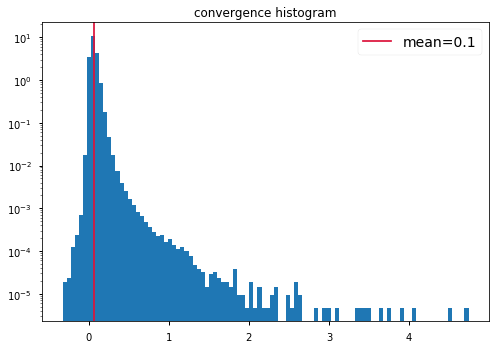

In [6]:
plt.figure()
plt.title('convergence histogram')
_ = plt.hist(mymap.value.flatten(),bins=100,density=True, log=True)
mean = np.mean(mymap)
plt.axvline(x=mean,color='crimson', label='mean=%.1f'%mean)
plt.legend(fontsize=14)
plt.show()

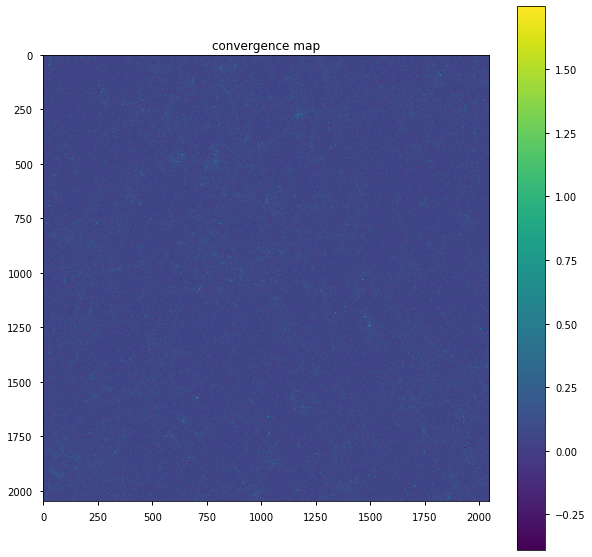

In [7]:
plt.figure(figsize=(10,10))
plt.title('convergence map')
plt.imshow(np.log(mymap+1))
plt.colorbar()
plt.show()

(0.0001, 0.005)

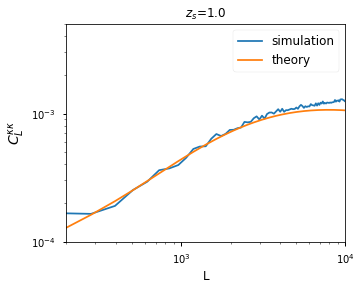

In [8]:
ll = len(my_run0.params['zs_source'])
plt.figure(figsize=(ll*5,4))
for ii, zs in enumerate(my_run0.params['zs_source']):
    plt.subplot(1,ll,ii+1)
    plt.title('$z_s$=%.1f'%zs,fontsize=12)
    plt.loglog(my_run0.measured_cls[str(zs)]['L'],my_run0.measured_cls[str(zs)]['L']**2*my_run0.measured_cls[str(zs)]['clkk'], label='simulation')
    plt.semilogx(my_run0.theory_cls[str(zs)]['L'],my_run0.theory_cls[str(zs)]['L']**2*my_run0.theory_cls[str(zs)]['clkk'], label='theory')
    plt.legend(fontsize=12)
    if ii==0:
        plt.ylabel('$C_L^{\kappa \kappa}$',fontsize=14)
    plt.xlabel('L',fontsize=12)
plt.xlim(200,10000)
plt.ylim(1e-4,5e-3)